In [1]:
# Importando bibiliotecas para EDA
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 
%matplotlib inline

In [2]:
#Funções criadas para serem utilizadas nesse trabalho
#def check_null_or_valid(coluna):
 #   """ Dropa em todos os valores que estão faltando e verfica se os valores que sobraram são >= 0 """

  #  no_na = coluna.dropna()
   # numeric = pd.to_numeric(no_na)
    #ge0 = numeric >= 0
    #return ge0


def convert(valor):
    if valor:
        # determine o multiplicador
        multiplier = 1
        if valor.endswith('k'):
            multiplier = 1000
            valor = valor[0:len(valor)-1] 
        elif valor.endswith('M'):
            multiplier = 1000000
            valor = valor[0:len(valor)-1]
        elif valor.endswith('B'):
            multiplier = 1000000000
            valor = valor[0:len(valor)-1]

        # converte para inteiro
        return int(float(valor) * multiplier)

    else:
        return 0



In [3]:
#Importaremos um total de 7 data Frames.
df_mort_infant = pd.read_csv(r'https://raw.githubusercontent.com/hidekiaoyanagi/mack_trabalho/main/child_mortality_0_5_year_olds_dying_per_1000_born.csv')
df_filhos_por_mulher = pd.read_csv(r'https://raw.githubusercontent.com/hidekiaoyanagi/mack_trabalho/main/children_per_woman_total_fertility.csv')
df_emissao_co2= pd.read_csv(r'https://raw.githubusercontent.com/hidekiaoyanagi/mack_trabalho/main/co2_emissions_tonnes_per_person.csv')
df_hdi = pd.read_csv(r'https://raw.githubusercontent.com/hidekiaoyanagi/mack_trabalho/main/hdi_human_development_index.csv')
df_gdp_por_pessoa = pd.read_csv(r'https://raw.githubusercontent.com/hidekiaoyanagi/mack_trabalho/main/income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
df_expec_vida = pd.read_csv(r'https://raw.githubusercontent.com/hidekiaoyanagi/mack_trabalho/main/life_expectancy_years.csv')
df_pop_total = pd.read_csv(r'https://raw.githubusercontent.com/hidekiaoyanagi/mack_trabalho/main/population_total.csv')
df_owid_edu = pd.read_csv(r'https://raw.githubusercontent.com/hidekiaoyanagi/mack_trabalho/main/owid_education_idx.csv')


# Exibindo os dataframes

In [4]:
print('\n')
print('df_mort_infant é o valor bruto de mortes de crianças de 0 a 5 anos para cada 1.000 nascimentos.')
print('\n')
df_mort_infant.head()



df_mort_infant é o valor bruto de mortes de crianças de 0 a 5 anos para cada 1.000 nascimentos.




,country,1799,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,...,2060,2061,2062,2063,2064,2065,2066,2067,2068,2069,2070,2071,2072,2073,2074,2075,2076,2077,2078,2079,2080,2081,2082,2083,2084,2085,2086,2087,2088,2089,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099
0,Afghanistan,469.0,469.0,469.0,469.0,469.0,469.0,470.0,470.0,470.0,470.0,470.0,470.0,470.0,470.0,470.0,470.0,471.0,471.0,471.0,471.0,471.0,471.0,471.0,471.0,471.0,471.0,473.0,473.0,473.0,473.0,473.0,473.0,473.0,473.0,473.0,473.0,474.0,474.0,474.0,...,21.00,20.60,20.20,19.90,19.50,19.10,18.80,18.40,18.10,17.80,17.40,17.10,16.80,16.60,16.30,16.00,15.80,15.50,15.20,15.00,14.80,14.50,14.30,14.10,13.80,13.60,13.40,13.20,12.90,12.80,12.60,12.40,12.20,12.00,11.80,11.60,11.50,11.30,11.10,11.10
1,Angola,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,...,27.20,26.70,26.30,25.80,25.40,24.90,24.50,24.10,23.70,23.40,23.00,22.60,22.30,21.90,21.60,21.30,21.00,20.80,20.50,20.20,20.00,19.70,19.50,19.20,19.00,18.80,18.60,18.30,18.10,17.90,17.70,17.50,17.30,17.10,17.00,16.80,16.60,16.40,16.30,16.30
2,Albania,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,...,3.45,3.40,3.35,3.30,3.25,3.20,3.16,3.11,3.07,3.03,2.98,2.94,2.90,2.87,2.83,2.79,2.76,2.72,2.68,2.65,2.62,2.59,2.55,2.52,2.49,2.46,2.44,2.41,2.38,2.35,2.32,2.30,2.27,2.24,2.22,2.19,2.16,2.14,2.11,2.11
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.40,1.38,1.35,1.33,1.31,1.29,1.27,1.25,1.23,1.21,1.18,1.17,1.15,1.13,1.11,1.09,1.08,1.06,1.04,1.02,1.01,0.99,0.97,0.96,0.94,0.93,0.91,0.90,0.88,0.87,0.86,0.84,0.83,0.81,0.80,0.79,0.78,0.77,0.76,0.76
4,United Arab Emirates,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,...,3.25,3.20,3.16,3.12,3.08,3.04,3.00,2.96,2.93,2.89,2.86,2.82,2.79,2.76,2.73,2.70,2.67,2.64,2.62,2.59,2.56,2.54,2.51,2.48,2.46,2.43,2.41,2.38,2.36,2.33,2.31,2.29,2.26,2.24,2.22,2.19,2.17,2.15,2.13,2.13


In [5]:
print('\n')
print('df_emissao_co2 emissão de Co2 em m³ causado pela queima de combustivel fossivel, medido por pessoa.')
print('\n')
df_emissao_co2.head()



df_emissao_co2 emissão de Co2 em m³ causado pela queima de combustivel fossivel, medido por pessoa.




,country,1799,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,...,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.167,0.132,0.15,0.163,0.201,0.231,0.294,0.267,0.269,0.246,0.233,0.21,0.183,0.0954,0.0844,0.0752,0.068,0.0619,0.0561,0.0522,0.0402,0.037,0.0376,0.0471,0.0509,0.0368,0.0515,0.0622,0.0838,0.152,0.238,0.29,0.406,0.345,0.28,0.253,0.262,0.245,0.247,0.254
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.682,0.640,0.61,0.518,0.550,0.519,0.470,0.449,0.542,0.457,0.430,0.43,0.414,0.4080,0.4400,0.2860,0.786,0.7250,0.4940,0.4740,0.5760,0.581,0.5710,0.7200,0.4960,0.9980,0.9790,1.1000,1.2000,1.180,1.230,1.24,1.250,1.350,1.28,1.640,1.220,1.180,1.140,1.120
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.890,1.930,2.68,2.620,2.680,2.690,2.650,2.650,2.380,2.290,2.760,1.68,1.310,0.7750,0.7310,0.6120,0.670,0.6510,0.4980,0.5630,0.9560,0.966,1.0300,1.2000,1.3800,1.3400,1.3800,1.2700,1.2900,1.460,1.470,1.56,1.790,1.690,1.69,1.900,1.600,1.570,1.610,1.590
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.47,7.180,6.9100,6.7400,6.4900,6.660,7.0600,7.2400,7.6600,7.9800,8.020,7.7900,7.5900,7.3200,7.3600,7.3000,6.7500,6.5200,6.430,6.120,6.12,5.870,5.920,5.90,5.830,5.970,6.070,6.270,6.120
4,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.300,36.100,33.60,31.600,28.700,35.700,36.400,32.500,31.000,29.600,31.400,28.30,29.300,28.2000,30.2000,31.7000,29.000,28.7000,27.4000,28.7000,26.2000,35.700,30.5000,24.1000,28.5000,27.5000,25.0000,23.0000,21.6000,21.700,20.900,18.30,18.900,23.800,23.70,24.200,20.700,21.700,21.100,21.400


In [6]:
print('\n')
print('df_hdi é um indice que leva em consideração a média de 3 dimensões de desenvolvimento humano, sendo estas:.')
print('Expectativa de vida, educação e qualidade de vida')
print('\n')
df_hdi.head()



df_hdi é um indice que leva em consideração a média de 3 dimensões de desenvolvimento humano, sendo estas:.
Expectativa de vida, educação e qualidade de vida




,country,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,0.298,0.304,0.312,0.308,0.303,0.327,0.331,0.335,0.339,0.343,0.345,0.347,0.378,0.387,0.400,0.410,0.419,0.431,0.436,0.447,0.464,0.465,0.479,0.485,0.488,0.490,0.491,0.493,0.496
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.384,0.394,0.404,0.419,0.428,0.440,0.453,0.466,0.482,0.494,0.508,0.510,0.525,0.537,0.547,0.557,0.565,0.570,0.576,0.574
2,Albania,0.644,0.625,0.608,0.611,0.617,0.629,0.639,0.639,0.649,0.660,0.667,0.673,0.680,0.687,0.692,0.702,0.709,0.718,0.724,0.729,0.740,0.759,0.771,0.781,0.787,0.788,0.788,0.789,0.791
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.759,0.767,0.780,0.820,0.826,0.819,0.829,0.829,0.831,0.830,0.828,0.827,0.849,0.846,0.853,0.850,0.854,0.852,0.857
4,United Arab Emirates,0.724,0.735,0.738,0.745,0.755,0.764,0.765,0.766,0.769,0.776,0.782,0.787,0.793,0.798,0.803,0.809,0.814,0.819,0.821,0.819,0.821,0.826,0.832,0.839,0.847,0.860,0.863,0.864,0.866


In [7]:
print('\n')
print('df_gdp_por_pessoa: PIB divido por pessoa - normalizado pela inflação e fixado em USD.')
print('\n')
df_gdp_por_pessoa.head()



df_gdp_por_pessoa: PIB divido por pessoa - normalizado pela inflação e fixado em USD.




,country,1799,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049
0,Afghanistan,674,674,674,674,674,674,674,674,674,674,675,675,675,675,675,675,675,675,675,675,675,679,681,683,685,688,690,692,694,697,699,701,704,707,709,711,713,716,719,...,1910,2080,2120,2100,2070,2060,2060,2030,2070,1920,1950,1990,2040,2070,2100,2140,2170,2210,2250,2300,2340,2390,2440,2490,2540,2590,2650,2710,2760,2820,2880,2940,3000,3070,3130,3200,3270,3340,3410,3480
1,Angola,691,693,697,700,702,705,709,712,716,718,721,724,728,731,735,738,740,743,747,750,754,754,755,756,756,757,757,758,758,759,759,761,761,762,762,762,763,763,764,...,7680,8040,8140,8240,8040,7570,7310,6930,6670,6220,6060,6020,6050,6090,6150,6190,6240,6300,6370,6460,6560,6680,6810,6950,7090,7240,7400,7550,7710,7880,8040,8220,8390,8570,8750,8940,9120,9320,9520,9720
2,Albania,746,746,746,746,746,747,747,747,747,747,747,747,747,747,747,748,748,748,748,748,748,750,751,754,755,757,758,760,761,764,765,767,769,770,773,774,776,777,779,...,11.1k,11.3k,11.4k,11.6k,11.9k,12.3k,12.8k,13.4k,13.7k,13.3k,13.9k,14.5k,15.1k,15.7k,16.3k,16.9k,17.5k,18.1k,18.6k,19.2k,19.7k,20.2k,20.6k,21.1k,21.6k,22k,22.5k,23k,23.5k,24k,24.5k,25k,25.5k,26.1k,26.6k,27.2k,27.8k,28.3k,28.9k,29.6k
3,Andorra,1340,1340,1340,1350,1350,1350,1350,1360,1360,1360,1360,1370,1370,1370,1370,1380,1380,1380,1380,1390,1390,1400,1420,1440,1460,1470,1490,1510,1530,1540,1560,1580,1600,1620,1640,1660,1680,1700,1720,...,46.9k,46.9k,48.9k,50.2k,52.1k,53.9k,55.6k,57.6k,59.6k,61.6k,63.7k,65.9k,68.2k,70.5k,72.9k,75.4k,77.9k,80.4k,82.9k,85.2k,87.4k,89.5k,91.6k,93.6k,95.6k,97.7k,99.7k,102k,104k,106k,108k,111k,113k,116k,118k,121k,123k,126k,128k,131k
4,United Arab Emirates,1120,1120,1120,1130,1130,1140,1140,1150,1150,1150,1160,1160,1170,1170,1180,1180,1180,1190,1190,1200,1200,1210,1210,1220,1220,1220,1230,1230,1240,1240,1250,1250,1260,1260,1270,1270,1280,1280,1290,...,56.1k,57.4k,59.9k,62.4k,65.2k,66.5k,67.2k,67k,67.1k,61.3k,61.3k,61k,60.7k,60.4k,60.2k,59.9k,59.7k,59.7k,59.9k,60.4k,61.1k,62.1k,63.2k,64.4k,65.7k,67.1k,68.5k,69.9k,71.4k,72.9k,74.5k,76.1k,77.7k,79.3k,81k,82.7k,84.5k,86.3k,88.1k,90k


In [8]:
print('\n')
print('df_expec_vida: Expectativa de Vida em anos.')
print('\n')
df_expec_vida.head()



df_expec_vida: Expectativa de Vida em anos.




,country,1799,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,...,2060,2061,2062,2063,2064,2065,2066,2067,2068,2069,2070,2071,2072,2073,2074,2075,2076,2077,2078,2079,2080,2081,2082,2083,2084,2085,2086,2087,2088,2089,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,28.1,28.1,28.1,28.1,28.1,28.1,28.1,28.1,28.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,27.9,27.9,27.9,27.9,27.9,27.9,27.9,27.9,27.9,27.9,27.9,27.8,27.8,27.8,...,71.5,71.7,71.8,72.0,72.1,72.2,72.3,72.5,72.6,72.7,72.9,73.0,73.1,73.3,73.4,73.5,73.7,73.8,74.0,74.1,74.2,74.3,74.5,74.6,74.8,74.9,75.0,75.2,75.3,75.4,75.5,75.7,75.8,76.0,76.1,76.2,76.4,76.5,76.6,76.8
1,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,74.8,75.0,75.1,75.3,75.4,75.5,75.7,75.8,76.0,76.1,76.2,76.4,76.5,76.6,76.8,76.9,77.0,77.2,77.3,77.4,77.5,77.7,77.8,77.9,78.0,78.2,78.3,78.4,78.6,78.7,78.8,79.0,79.1,79.2,79.3,79.5,79.6,79.7,79.9,80.0
2,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,84.3,84.4,84.5,84.6,84.7,84.8,84.9,85.0,85.2,85.3,85.4,85.5,85.6,85.7,85.8,85.9,86.0,86.1,86.2,86.3,86.4,86.5,86.6,86.7,86.8,86.9,87.0,87.1,87.2,87.3,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.2,88.3,88.4
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United Arab Emirates,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,...,79.3,79.4,79.5,79.7,79.8,79.9,80.0,80.1,80.2,80.3,80.4,80.5,80.7,80.8,80.9,81.0,81.0,81.2,81.3,81.3,81.4,81.5,81.6,81.7,81.8,81.9,82.0,82.1,82.2,82.3,82.4,82.5,82.6,82.7,82.8,82.9,83.0,83.1,83.2,83.3


In [9]:
print('\n')
print('df_pop_total: População Total.')
print('\n')
df_pop_total.head()



df_pop_total: População Total.




,country,1799,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,...,2060,2061,2062,2063,2064,2065,2066,2067,2068,2069,2070,2071,2072,2073,2074,2075,2076,2077,2078,2079,2080,2081,2082,2083,2084,2085,2086,2087,2088,2089,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099
0,Afghanistan,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.29M,3.3M,3.31M,3.32M,3.34M,3.35M,3.37M,3.38M,3.4M,3.41M,3.43M,3.45M,3.46M,3.48M,3.49M,3.51M,3.52M,3.54M,3.55M,...,71.4M,71.8M,72.3M,72.8M,73.2M,73.6M,74M,74.3M,74.7M,75M,75.3M,75.5M,75.8M,76M,76.2M,76.4M,76.5M,76.7M,76.8M,76.9M,76.9M,77M,77M,77M,77M,77M,76.9M,76.9M,76.8M,76.7M,76.6M,76.4M,76.3M,76.1M,76M,75.8M,75.6M,75.4M,75.2M,74.9M
1,Angola,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.58M,1.59M,1.61M,1.64M,1.66M,1.69M,1.71M,1.74M,1.76M,1.79M,1.81M,1.84M,1.87M,1.9M,1.92M,1.95M,1.98M,2.01M,2.04M,...,99.5M,102M,104M,106M,108M,110M,112M,115M,117M,119M,121M,124M,126M,128M,131M,133M,135M,137M,140M,142M,144M,147M,149M,151M,154M,156M,158M,161M,163M,165M,168M,170M,172M,175M,177M,179M,182M,184M,186M,188M
2,Albania,400k,402k,404k,405k,407k,409k,411k,413k,414k,416k,418k,420k,422k,424k,426k,427k,429k,431k,433k,435k,437k,439k,441k,443k,445k,447k,449k,451k,453k,455k,457k,459k,461k,463k,465k,467k,470k,472k,474k,...,2.17M,2.14M,2.12M,2.09M,2.07M,2.04M,2.02M,1.99M,1.97M,1.94M,1.92M,1.89M,1.86M,1.83M,1.81M,1.78M,1.75M,1.72M,1.69M,1.66M,1.63M,1.6M,1.57M,1.54M,1.51M,1.48M,1.45M,1.42M,1.39M,1.36M,1.33M,1.3M,1.27M,1.25M,1.22M,1.19M,1.17M,1.14M,1.11M,1.09M
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,2650,2650,2650,2650,2650,2650,2650,2650,2650,2650,2660,2670,2680,2690,2710,2730,2750,2770,2790,2810,2830,2850,2870,2890,2910,2930,2950,2970,2990,3010,...,71.3k,70.8k,70.2k,69.7k,69.2k,68.7k,68.3k,67.8k,67.4k,66.9k,66.5k,66.2k,65.8k,65.5k,65.2k,64.9k,64.6k,64.4k,64.2k,64k,63.9k,63.7k,63.6k,63.5k,63.4k,63.3k,63.3k,63.2k,63.1k,63.1k,63k,62.9k,62.9k,62.8k,62.7k,62.7k,62.6k,62.5k,62.5k,62.4k
4,United Arab Emirates,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,...,10.7M,10.7M,10.7M,10.8M,10.8M,10.9M,10.9M,11M,11M,11.1M,11.1M,11.1M,11.2M,11.3M,11.3M,11.4M,11.4M,11.5M,11.5M,11.6M,11.7M,11.7M,11.8M,11.9M,11.9M,12M,12.1M,12.1M,12.2M,12.3M,12.3M,12.4M,12.5M,12.5M,12.6M,12.7M,12.7M,12.8M,12.8M,12.9M


In [155]:
print('\n')
print('df_owid_edu é valor em % de indicador de anos de estudo, sendo que o máximo é 15 anos - (100% = 15 anos).')
print('\n')
df_owid_edu.head()



df_owid_edu é valor em % de indicador de anos de estudo, sendo que o máximo é 15 anos - (100% = 15 anos).




,country,1869,1874,1875,1876,1877,1878,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,1910,1911,...,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,0.0667,0.0667,NaN,NaN,NaN,NaN,0.0667,NaN,NaN,NaN,NaN,0.0667,NaN,NaN,NaN,NaN,0.0667,NaN,NaN,NaN,NaN,0.0667,NaN,NaN,NaN,NaN,0.0667,NaN,NaN,NaN,NaN,0.0667,NaN,NaN,NaN,NaN,0.0667,NaN,NaN,...,NaN,NaN,5.2,NaN,NaN,NaN,NaN,7.73,NaN,NaN,NaN,NaN,9.93,10.7,10.7,11.3,12.0,12.7,12.7,13.3,13.3,14.0,14.7,14.7,15.3,16.0,16.7,17.3,18.0,19.3,20.0,20.7,21.3,22.0,22.7,23.3,23.3,24.0,24.0,25.3
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.3,29.3,29.3,29.3,29.3,29.3,29.3,30.0,30.0,30.7,31.3,31.3,31.3,32.0,32.7,32.7,33.3,34.0,34.0
2,Albania,0.1330,0.1330,NaN,NaN,NaN,NaN,0.1330,NaN,NaN,NaN,NaN,0.2000,NaN,NaN,NaN,NaN,0.2670,NaN,NaN,NaN,NaN,0.2670,NaN,NaN,NaN,NaN,0.4000,NaN,NaN,NaN,NaN,0.4670,NaN,NaN,NaN,NaN,0.6000,NaN,NaN,...,NaN,NaN,33.0,NaN,NaN,NaN,NaN,45.00,NaN,NaN,NaN,NaN,52.20,52.0,52.0,52.0,52.0,53.3,54.7,55.3,56.7,57.3,58.7,58.0,60.0,60.0,60.7,60.7,61.3,61.3,61.3,62.0,62.0,62.0,64.0,64.7,64.7,64.7,66.7,66.7
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.7,47.3,50.7,67.3,70.0,65.3,67.3,67.3,67.3,67.3,67.3,68.0,68.0,68.0,68.0,68.0,68.0,68.0
4,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,23.9,NaN,NaN,NaN,NaN,29.80,NaN,NaN,NaN,NaN,37.50,39.3,41.3,43.3,45.3,47.3,48.7,50.7,52.0,53.3,55.3,56.0,57.3,58.0,59.3,60.7,62.0,62.7,64.0,64.7,66.0,66.7,68.0,68.7,70.0,70.7,72.0,72.0


# Vamos ajustar os dados para criar um DF unico para os paises do BRIC

In [11]:
#Nossos Dados serão apenas para o BRIC - Brasil, Russia, India, China

lista_paises = ['Brazil', 'India', 'China', 'Russia']


In [12]:
#Filtraremos todos os dataframes criados anteriormente para a lista_paises, com isso teremos novos DFs que amparam a nossa condição de países do BRIC
mort_infant_bric =  df_mort_infant[df_mort_infant['country'].isin(lista_paises)]
filhos_por_mulher_bric = df_filhos_por_mulher[df_filhos_por_mulher['country'].isin(lista_paises)]
emissao_co2_bric= df_emissao_co2[df_emissao_co2['country'].isin(lista_paises)]
hdi_bric = df_hdi[df_hdi['country'].isin(lista_paises)]
gdp_por_pessoa_bric =df_gdp_por_pessoa[df_gdp_por_pessoa['country'].isin(lista_paises)]
expec_vida_bric = df_expec_vida[df_expec_vida['country'].isin(lista_paises)]
pop_total_bric = df_pop_total[df_pop_total['country'].isin(lista_paises)]
owid_edu_bric = df_owid_edu[df_owid_edu['country'].isin(lista_paises)]

lista_bric = [mort_infant_bric, filhos_por_mulher_bric,emissao_co2_bric,hdi_bric,gdp_por_pessoa_bric,expec_vida_bric,pop_total_bric,owid_edu_bric]

for i in lista_bric:
  i.reset_index(drop=True, inplace=True)


In [13]:
#Ajustando valores de GDP para isso resetaremos os indices e utilizaremos uma matriz transporta do gdp inicial chamada de converter.
#Além disso, utilizaremos os dados de anos em uma lista apartada chamada de datas

gdp_por_pessoa_bric.reset_index(drop=True, inplace=True)
datas = gdp_por_pessoa_bric.T.index.tolist()
converter = gdp_por_pessoa_bric.T.reset_index(drop=True)

In [14]:
#Ajustando os valores K em GDP
#utilizaremos o loop para cada pais do BRIC e chamaremos a função "converter" que foi criada no inicio do projeto.
#Essa função irá multiplicar os valores que possuem k no final para Valor * 1000 e converterá para int - já que agora eles são str.

ignorar = ['Brazil','China','India','Russia']
brazil = []
for i in converter[0]:
    if i not in ignorar and type(i) == str:
      x = convert(i)
      brazil.append(x)
    else:
      brazil.append(i)  


china = []      

for i in converter[1]:
    if i not in ignorar and type(i) == str:
      x = convert(i)
      china.append(x)
    else:
      china.append(i)  


india = []      

for i in converter[2]:
    if i not in ignorar and type(i) == str:
      x = convert(i)
      india.append(x)
    else:
      india.append(i)  


russia = []
for i in converter[3]:
    if i not in ignorar and type(i) == str:
      x = convert(i)
      russia.append(x)
    else:
      russia.append(i)  
gdp_por_pessoa_bric = pd.DataFrame({'list1':datas, 'list2':brazil, 'list3':china, 'list4':india, 'lista5':russia})

if gdp_por_pessoa_bric.columns[1] != 'Brazil':
  gdp_por_pessoa_bric = gdp_por_pessoa_bric.T
  gdp_por_pessoa_bric.columns = gdp_por_pessoa_bric.iloc[0]
  gdp_por_pessoa_bric = gdp_por_pessoa_bric[1:]
  gdp_por_pessoa_bric.reset_index(drop=True, inplace=True)
  gdp_por_pessoa_bric = gdp_por_pessoa_bric.rename_axis(None, axis=1)
  gdp_por_pessoa_bric

In [15]:
pop_total_bric

pop_total_bric.reset_index(drop=True, inplace=True)
datas = pop_total_bric.T.index.tolist()
converter = pop_total_bric.T.reset_index(drop=True)

In [16]:
#Ajustando os valores K, M e B em pop_total_bric
#utilizaremos o loop para cada pais do BRIC e chamaremos a função "converter" que foi criada no inicio do projeto.
#Essa função irá multiplicar os valores que possuem k no final para Valor * 1000 e converterá para int - já que agora eles são str.
#Essa função irá multiplicar os valores que possuem M no final para Valor * 1000000 e converterá para int - já que agora eles são str.
#Essa função irá multiplicar os valores que possuem B no final para Valor * 1000000000 e converterá para int - já que agora eles são str.

ignorar = ['Brazil','China','India','Russia']
brazil = []
for i in converter[0]:
    if i not in ignorar and type(i) == str:
      x = convert(i)
      brazil.append(x)
    else:
      brazil.append(i)  


china = []      

for i in converter[1]:
    if i not in ignorar and type(i) == str:
      x = convert(i)
      china.append(x)
    else:
      china.append(i)  


india = []      

for i in converter[2]:
    if i not in ignorar and type(i) == str:
      x = convert(i)
      india.append(x)
    else:
      india.append(i)  


russia = []
for i in converter[3]:
    if i not in ignorar and type(i) == str:
      x = convert(i)
      russia.append(x)
    else:
      russia.append(i)  

pop_total_bric = pd.DataFrame({'list1':datas, 'list2':brazil, 'list3':china, 'list4':india, 'lista5':russia})

if pop_total_bric.columns[1] != 'Brazil':
  pop_total_bric = pop_total_bric.T
  pop_total_bric.columns = pop_total_bric.iloc[0]
  pop_total_bric = pop_total_bric[1:]
  pop_total_bric.reset_index(drop=True, inplace=True)
  pop_total_bric = pop_total_bric.rename_axis(None, axis=1)
  pop_total_bric





In [17]:
lista_bric = [mort_infant_bric, filhos_por_mulher_bric,emissao_co2_bric,hdi_bric,gdp_por_pessoa_bric,expec_vida_bric,pop_total_bric,owid_edu_bric]

for i in lista_bric:
  i.reset_index(drop=True, inplace=True)


In [18]:
#Para criarmos 1 dataframe unico, precisamos entender quais são os anos que devemos considerar para que não haja um descasamento de informações a serem comparadas!
#nesse loop, descobriremos qual é o maior valor que precisamos considerar para ser nossa data inicio e o menor valor para ser a nossa data final!


maior_data_inicial = []
menor_data_final = []
for i in lista_bric:
  primeira_data = int(i.columns[1])
  maior_data_inicial.append(primeira_data)
  ultima_data = int(i.columns[-1])
  menor_data_final.append(ultima_data)


print(f'Primeiro ano a ser auferido: %s'%max(maior_data_inicial)) 
print(f'Ultimo ano  a ser auferido: %s'%min(menor_data_final))
print('Com isso descobrimos que as colunas do nosso dataset precisa começar em %s e terminar em %s para amparar todas os dataframes!' %(max(maior_data_inicial),min(menor_data_final)))

Primeiro ano a ser auferido: 1989
Ultimo ano  a ser auferido: 2016
Com isso descobrimos que as colunas do nosso dataset precisa começar em 1989 e terminar em 2016 para amparar todas os dataframes!


In [19]:
#Precisamos somar mais um porque o python não curte mto considerar o ultimo valor de uma lista..
lista_datas_colunas = ['country']

range_datas_colunas = range(int(max(maior_data_inicial)),int(min(menor_data_final)+1))
for ano in range_datas_colunas:
  ano = str(ano)
  lista_datas_colunas.append(ano)



lista_ajustada_data_bric = []
for i in lista_bric:
  i.reset_index(drop=True, inplace=True)
  i = i[lista_datas_colunas]
  lista_ajustada_data_bric.append(i)


lista_ajustada_data_bric


# Mudaremos o nome da coluna Country de cada data_frame pelo nome do indicador que estamos verificando

nomes = ['mort_infant', 'filhos_mulher', 'emissao_co2','hdi','gdp_por_pessoa', 'expec_vida','pop_total', 'owid_edu']
x = 0
for i in lista_ajustada_data_bric:
  i.rename(columns={'country': nomes[x]}, inplace=True)
  x += 1

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


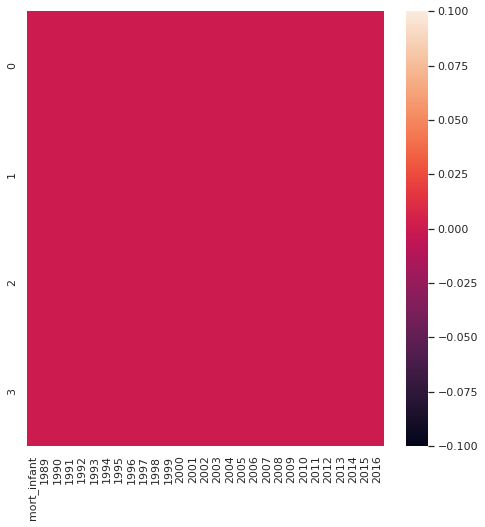

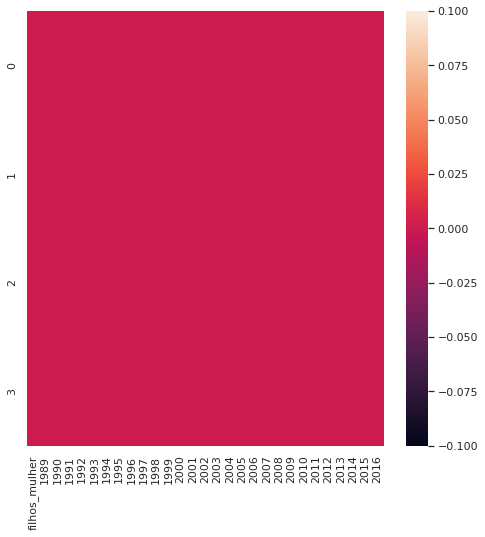

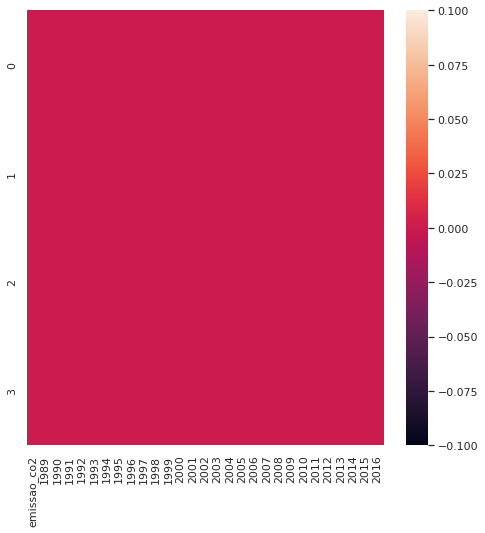

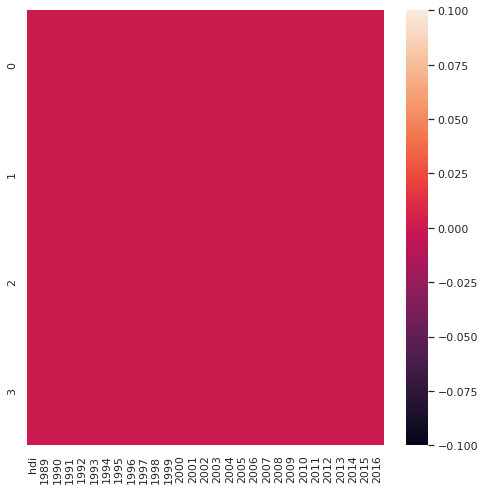

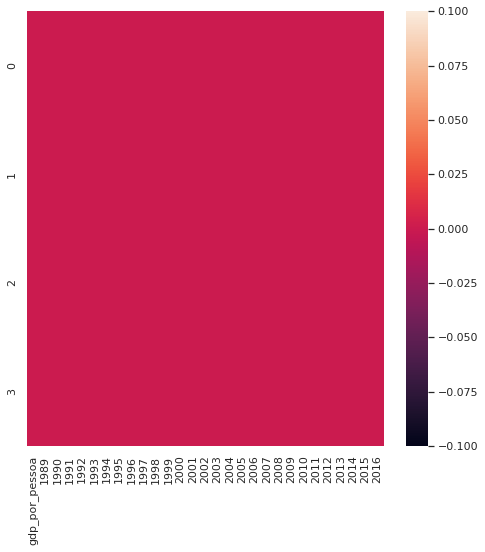

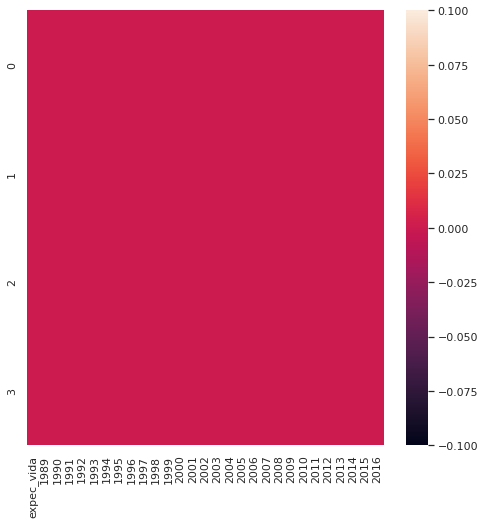

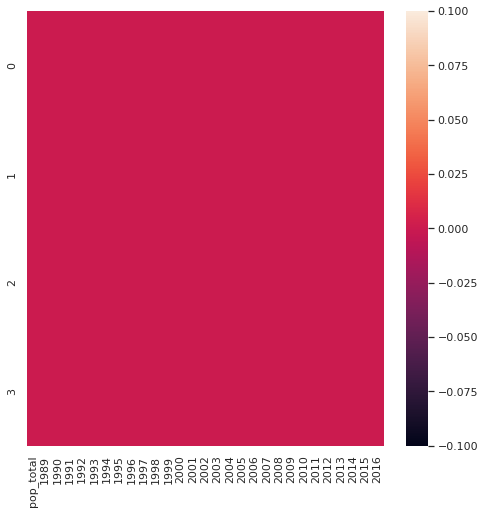

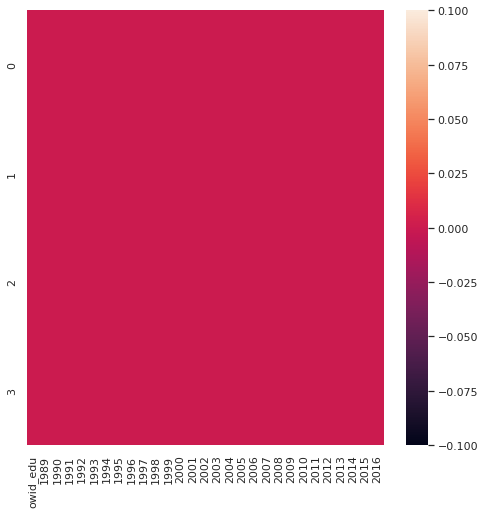

In [20]:
#Vamos verificar se existe valores nulos dentro dos nossos dataframes da lista_bric
#Não temos nenhum valor nulo!
for i in lista_ajustada_data_bric:
  plt.figure(figsize=(8,8))
  sns.heatmap(i.isnull())




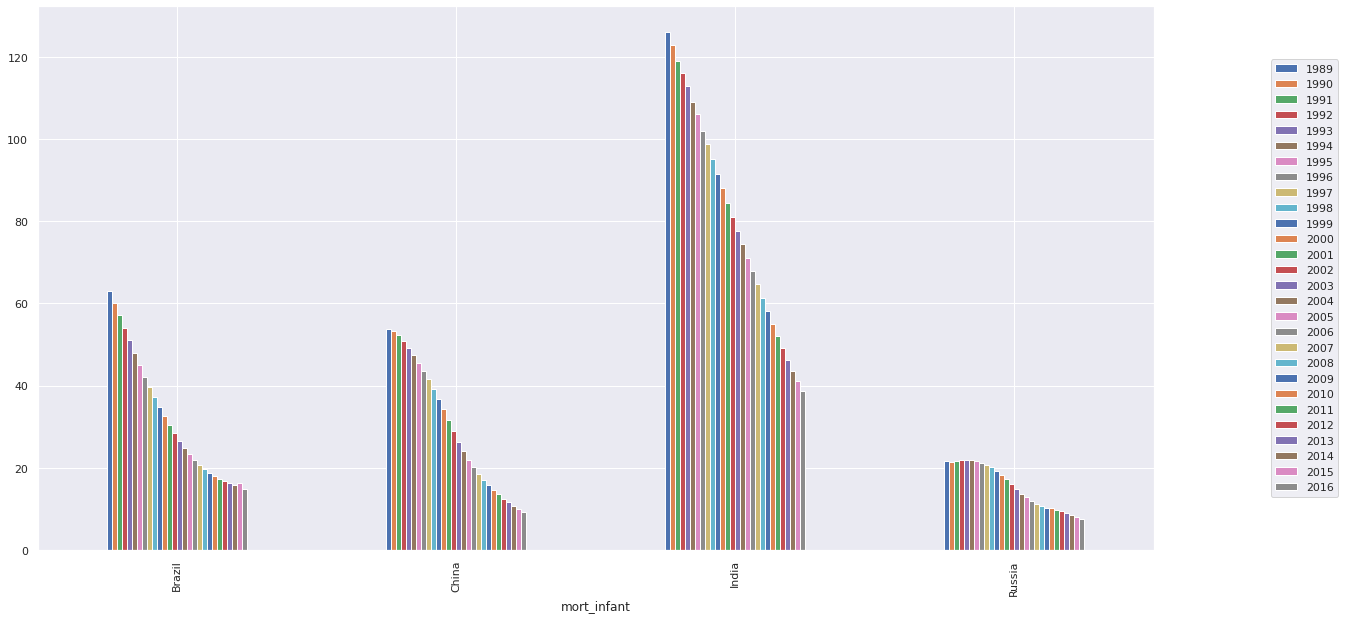

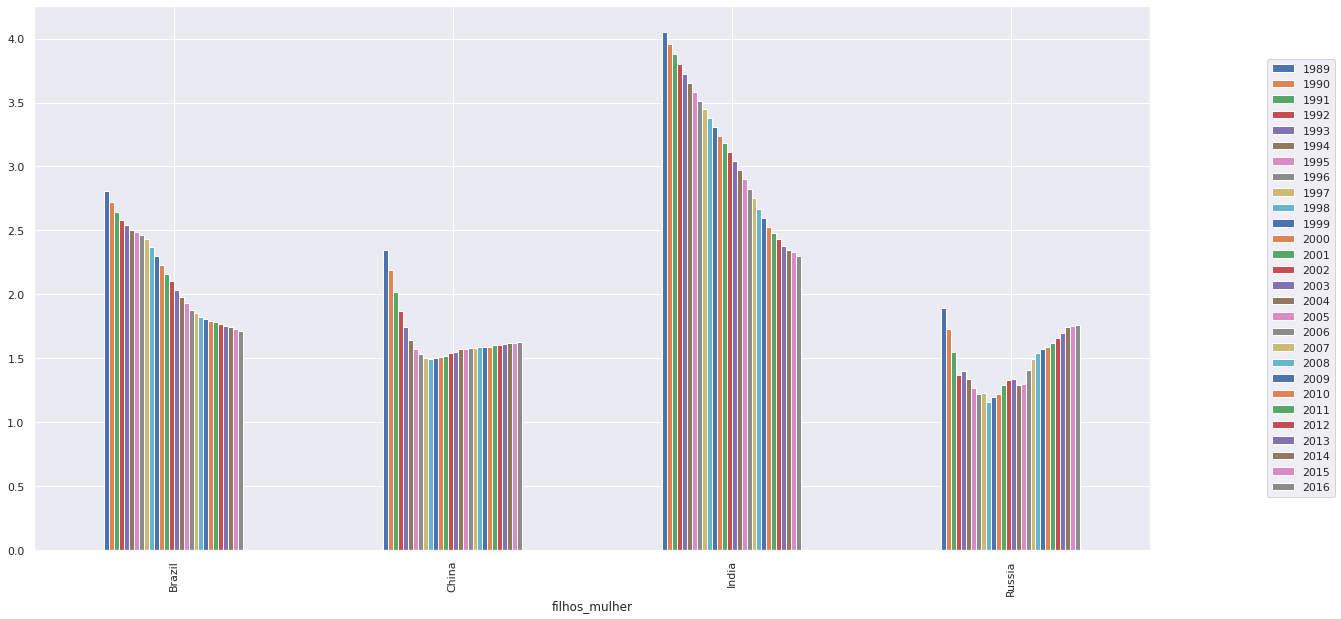

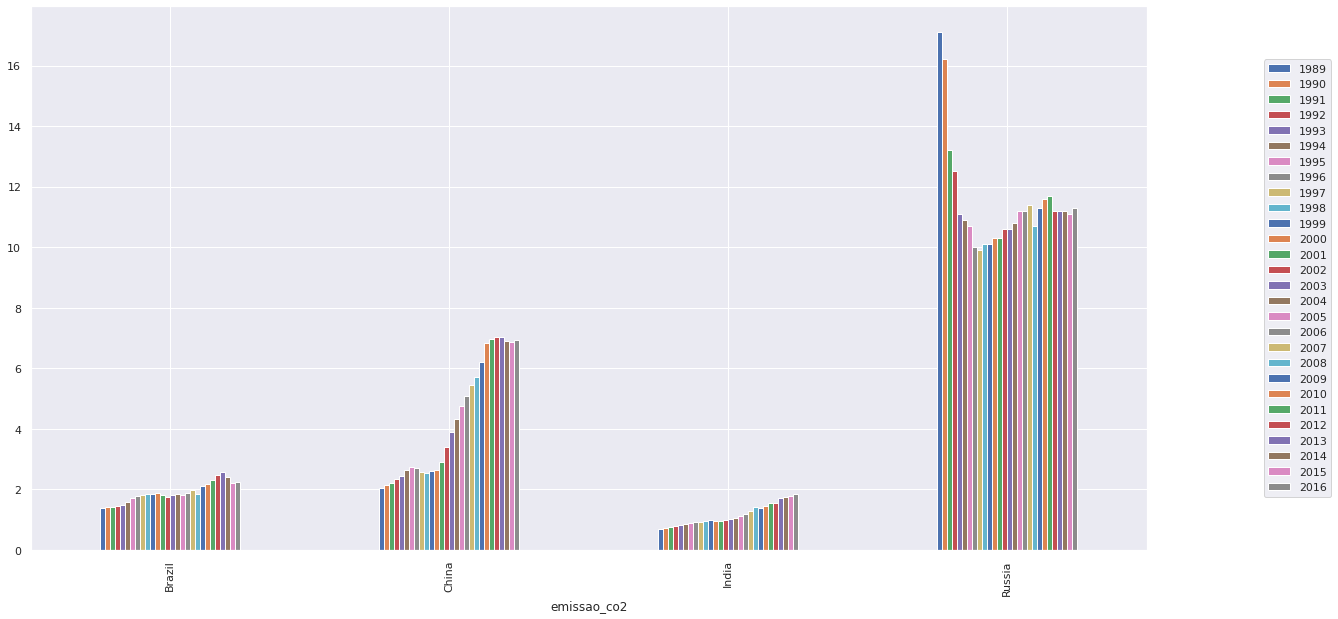

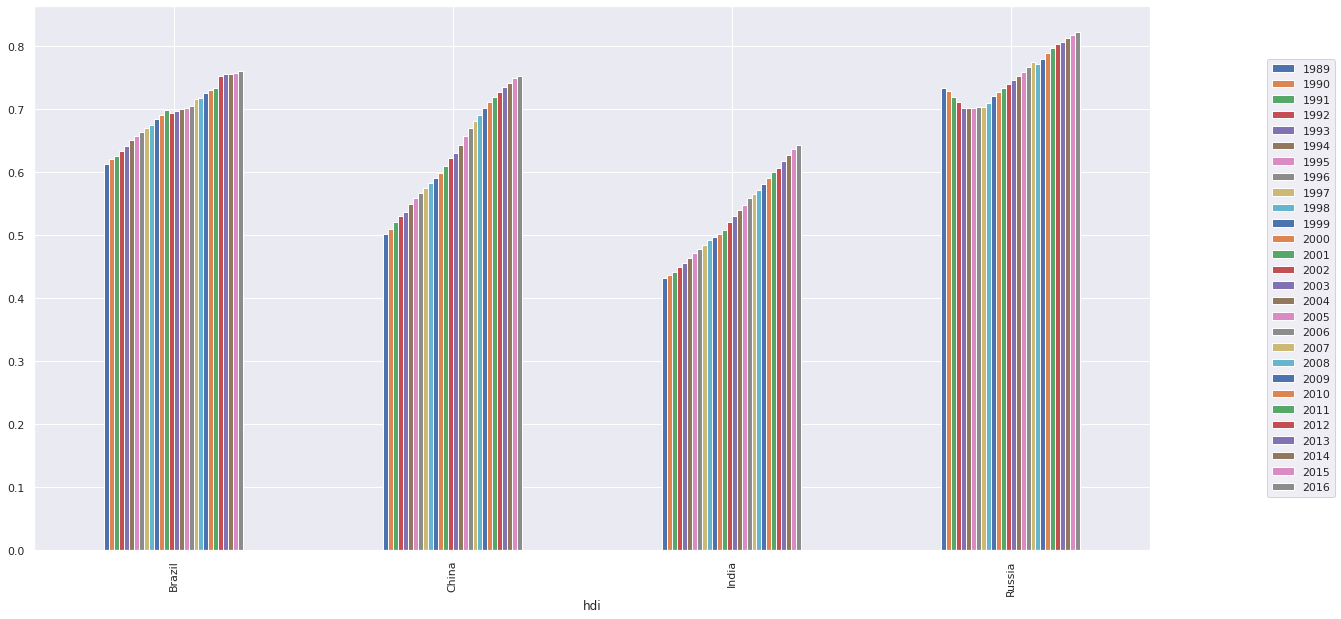

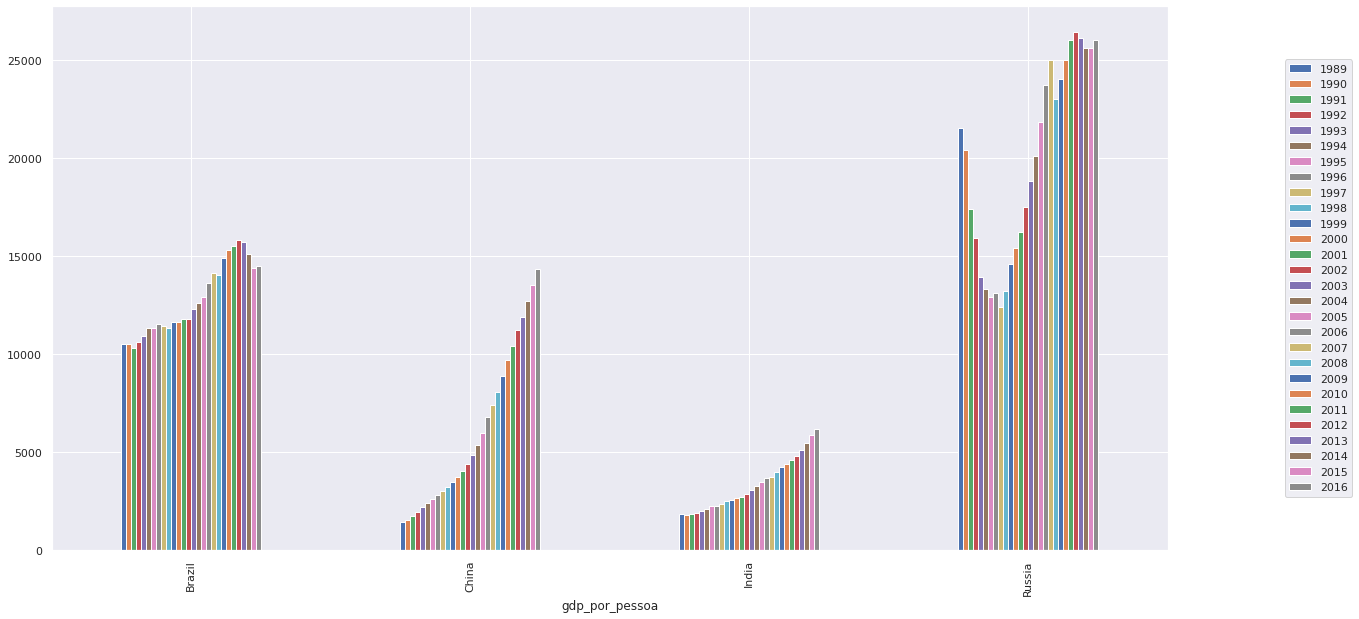

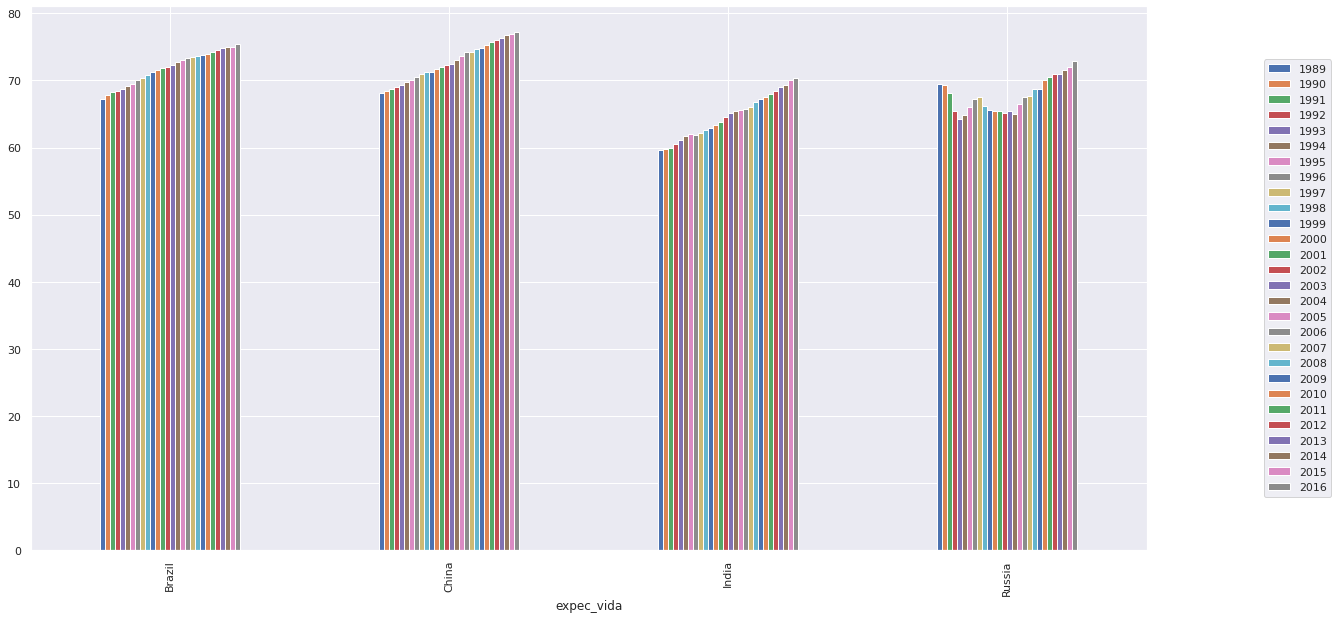

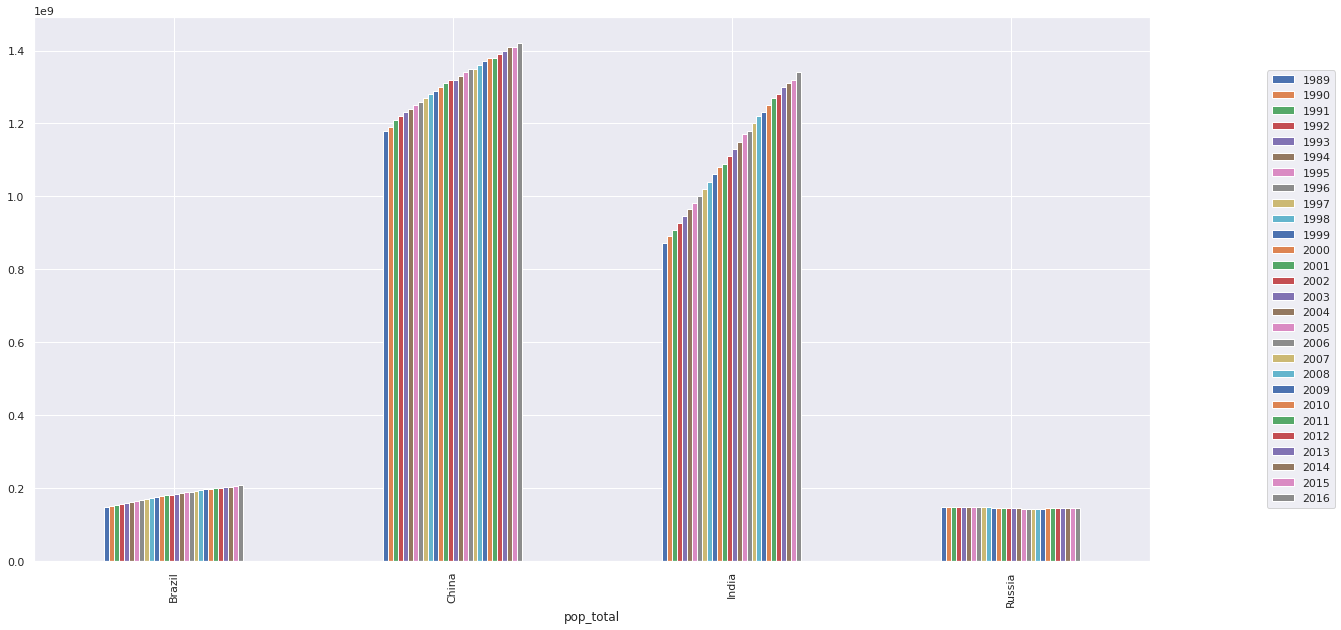

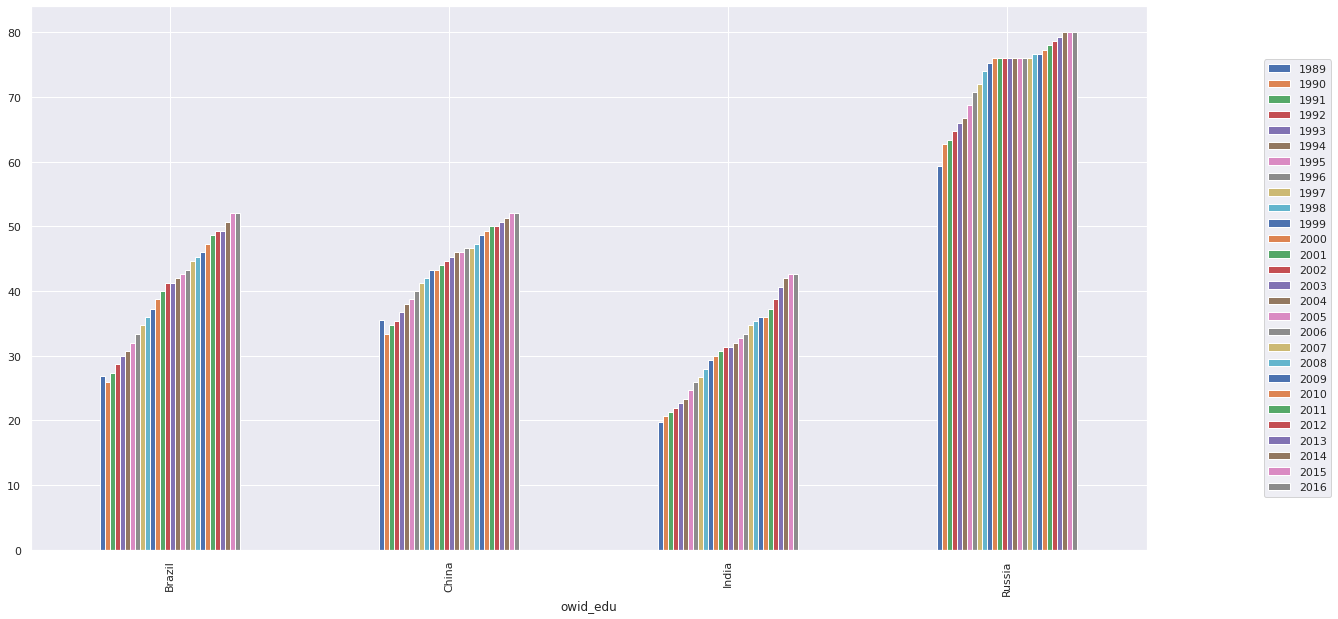

In [21]:
#vamos plotar cada indicador e observar suas variações pelo tempo - 1989~2017
#Apesar das melhoras em quase todos os indicadores, é assustador o aumento de CO2 por pessoa que a China apresenta.
#Além disso, a redução drastica em 1989 até 1997 na emissão de CO2 na Russia, pode se dar pelo fim da Guerra Fria que foi em 3 de dezembro de 1989.
# A curva de GDP da russia entre os anos de 1989 até 1997, muito tem haver com as questões politicas da região.
#Sendo que sua curva volta a crescer com a chegada das oligarquias russas no seu auge em 1996, durante o governo de Boris Yeltsin.
#E escalando ainda mais a partir do começo dos anos 2000, quando Yeltsin renunciou e Vladimir Putin assumiu interinamente a presidência da Federação Russa.


#lista_bric = [mort_infant_bric, filhos_por_mulher_bric,emissao_co2_bric,hdi_bric,gdp_por_pessoa_bric,expec_vida_bric,pop_total_bric, owid_edu_bric]
x=0
for i in lista_ajustada_data_bric:
  teste = lista_ajustada_data_bric[x].set_index(lista_ajustada_data_bric[x].columns[0])
  a = teste.plot(kind='bar',figsize=(20,10))
  a.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
  plt.show()
  x += 1

# Illustrate


In [22]:
#lista_ajustada_data_bric

#Vamos utilizar o loop para ajusta os dfs e aproveitar para renomear as colunas e ajustar a coluna year que esta como str, vamos deixa-la como int!

for i in lista_ajustada_data_bric:
  x = 0  
  df1 = pd.melt(lista_ajustada_data_bric[x], id_vars = 'mort_infant')
  df1.columns = ['country', 'year', 'mort_infant']
  df1['year'] = pd.to_numeric(df1['year'])
  x += 1
  df2 = pd.melt(lista_ajustada_data_bric[x], id_vars = 'filhos_mulher')
  df2.columns = ['country', 'year', 'filhos_mulher']
  df2['year'] = pd.to_numeric(df2['year'])
  x += 1
  df3 = pd.melt(lista_ajustada_data_bric[x], id_vars = 'emissao_co2')
  df3.columns = ['country', 'year', 'emissao_co2']
  df3['year'] = pd.to_numeric(df3['year'])
  x += 1
  df4 = pd.melt(lista_ajustada_data_bric[x], id_vars = 'hdi')
  df4.columns = ['country', 'year', 'hdi']
  df4['year'] = pd.to_numeric(df4['year'])
  x += 1
  df5 = pd.melt(lista_ajustada_data_bric[x], id_vars = 'gdp_por_pessoa')
  df5.columns = ['country', 'year', 'gdp_por_pessoa']
  df5['year'] = pd.to_numeric(df5['year'])
  x += 1
  df6 = pd.melt(lista_ajustada_data_bric[x], id_vars = 'expec_vida')
  df6.columns = ['country', 'year', 'expec_vida']
  df6['year'] = pd.to_numeric(df6['year'])
  x += 1
  df7 = pd.melt(lista_ajustada_data_bric[x], id_vars = 'pop_total')
  df7.columns = ['country', 'year', 'pop_total']
  df7['year'] = pd.to_numeric(df7['year'])
  x += 1
  df8 = pd.melt(lista_ajustada_data_bric[x], id_vars = 'owid_edu')
  df8.columns = ['country', 'year', 'owid_edu']
  df8['year'] = pd.to_numeric(df8['year'])
  

In [23]:
#Vamos dar merge em nossos DFS para criar um unico!

#Primeiro vamos criar dfs auxiliares que são o merge do 1 e n, 1+1 e n-1, 1+1+1 e n-1-1.
#- lembrando que queremos usar inner join pois queremos o resultado da  intersecção das duas tabelas!
new_df1 = pd.merge(df1, df8, how='inner', left_on=['year','country'], right_on=['year','country'])
new_df2 = pd.merge(df2, df7, how='inner', left_on=['year','country'], right_on=['year','country'])
new_df3 = pd.merge(df3, df6, how='inner', left_on=['year','country'], right_on=['year','country'])
new_df4 = pd.merge(df4, df5, how='inner', left_on=['year','country'], right_on=['year','country'])

#Vamos criar mais 2 merges auxiliares!
# - lembrando que queremos usar inner join pois queremos o resultado da  intersecção das duas tabelas!
merge_1 = pd.merge(new_df1, new_df2, how='inner', left_on=['year','country'], right_on=['year','country'])
merge_2 = pd.merge(new_df3, new_df4, how='inner', left_on=['year','country'], right_on=['year','country'])

#Df_final - lembrando que queremos usar inner join pois queremos o resultado da  intersecção das duas tabelas!
df_gapminder_bric = pd.merge(merge_1, merge_2, how='inner', left_on=['year','country'], right_on=['year','country'])
df_gapminder_bric

,country,year,mort_infant,owid_edu,filhos_mulher,pop_total,emissao_co2,expec_vida,hdi,gdp_por_pessoa
0,Brazil,1989,63.00,26.9,2.81,149000000,1.390,67.3,0.613,10500
1,China,1989,53.70,35.6,2.35,1180000000,2.060,68.1,0.501,1420
2,India,1989,126.00,19.7,4.05,873000000,0.707,59.6,0.431,1810
3,Russia,1989,21.60,59.4,1.89,148000000,17.100,69.5,0.734,21500
4,Brazil,1990,60.20,26.0,2.72,152000000,1.430,67.9,0.620,10500
...,...,...,...,...,...,...,...,...,...,...
107,Russia,2015,8.02,80.0,1.75,145000000,11.100,72.0,0.817,25600
108,Brazil,2016,14.80,52.0,1.71,208000000,2.230,75.4,0.760,14500
109,China,2016,9.23,52.0,1.63,1420000000,6.930,77.2,0.753,14300
110,India,2016,38.70,42.7,2.30,1340000000,1.840,70.3,0.643,6190


In [24]:
#Vamos verificar o shape da nossa nova tabela
print("*"*50)
print("\n")
print("Vamos verificar os types das nossas colunas")
print(df_gapminder_bric.dtypes)
print("\n")
print("*"*50)
print("\n")
print("Vamos verificar a qntd de linhas e colunas do novo df:")
print(df_gapminder_bric.shape)
print("\n")
print("*"*50)
print("\n")
print('Temos um total de 112 linhas e 10 colunas!')
print("\n")
print("*"*50)


**************************************************


Vamos verificar os types das nossas colunas
country            object
year                int64
mort_infant       float64
owid_edu          float64
filhos_mulher     float64
pop_total          object
emissao_co2       float64
expec_vida        float64
hdi               float64
gdp_por_pessoa     object
dtype: object


**************************************************


Vamos verificar a qntd de linhas e colunas do novo df:
(112, 10)


**************************************************


Temos um total de 112 linhas e 10 colunas!


**************************************************


**************************************************


Conclusão: Não temos nenhum NAN


**************************************************


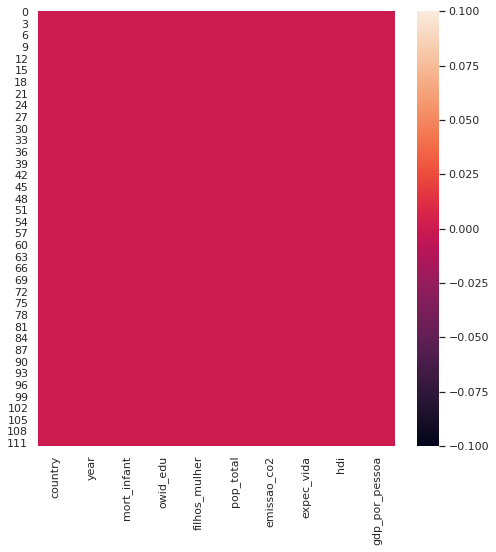

In [25]:
#Vamos verificar a existência de algum Nulo nesse novo DF.
plt.figure(figsize=(8,8))
sns.heatmap(df_gapminder_bric.isnull())

print("*"*50)
print("\n")
print("Conclusão: Não temos nenhum NAN")
print("\n")
print("*"*50)

# Finalmente nosso EDA

In [134]:
#Nosso dataframe será o : df_gapminder_bric
#Nele esta contido os dados de mort_infant_bric, filhos_por_mulher_bric,emissao_co2_bric,hdi_bric,gdp_por_pessoa_bric,expec_vida_bric,pop_total_bric, owid_edu_bric
#Para todos os paises do BRIC para a data de 1989 até 2016.


In [151]:
#Para facilitar algumas relações historicas dentro de um mesmo país vamos criar 4 novos dfs.
df_gapminder_br = df_gapminder_bric.query('country == "Brazil"')
df_gapminder_ch = df_gapminder_bric.query('country == "China"')
df_gapminder_in = df_gapminder_bric.query('country == "India"')
df_gapminder_ru = df_gapminder_bric.query('country == "Russia"')

lista_gapminder_bric = [df_gapminder_br, df_gapminder_ch, df_gapminder_in, df_gapminder_ru]

# Questão 1: Algum dos paises do BRIC esta crescendo mais em termos de GDP que os outros?

,country,year,mort_infant,owid_edu,filhos_mulher,pop_total,emissao_co2,expec_vida,hdi,gdp_por_pessoa
2,India,1989,126.0,19.7,4.05,873000000,0.707,59.6,0.431,1810
6,India,1990,123.0,20.7,3.96,891000000,0.737,59.8,0.436,1790
10,India,1991,119.0,21.3,3.88,909000000,0.769,60.0,0.442,1850
14,India,1992,116.0,22.0,3.80,927000000,0.780,60.6,0.449,1900
18,India,1993,113.0,22.7,3.72,946000000,0.809,61.2,0.456,1990
22,India,1994,109.0,23.3,3.65,964000000,0.843,61.7,0.463,2100
26,India,1995,106.0,24.7,3.58,982000000,0.895,62.0,0.471,2220
30,India,1996,102.0,26.0,3.51,1000000000,0.915,61.9,0.477,2260
34,India,1997,98.8,26.7,3.45,1020000000,0.916,62.1,0.484,2360
38,India,1998,95.2,28.0,3.38,1040000000,0.960,62.6,0.492,2520


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

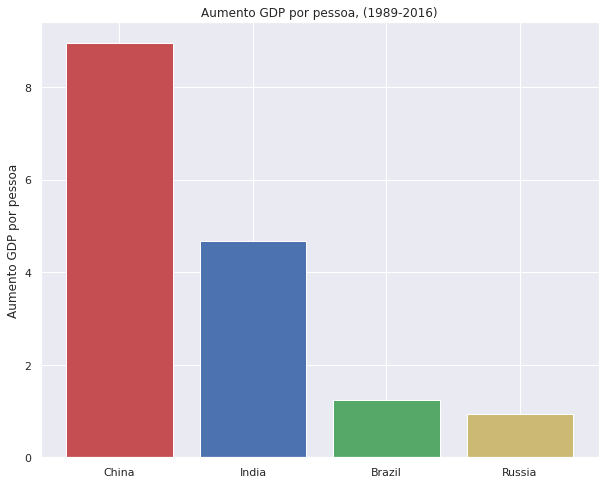

In [153]:

china_pc_crescimento = df_gapminder_ch['gdp_por_pessoa'] = df_gapminder_ch.groupby('country')['gdp_por_pessoa'].pct_change() * 100
india_pc_crescimento = df_gapminder_in['gdp_por_pessoa'] = df_gapminder_in.groupby('country')['gdp_por_pessoa'].pct_change() * 100
brazil_pc_crescimento = df_gapminder_br['gdp_por_pessoa'] = df_gapminder_br.groupby('country')['gdp_por_pessoa'].pct_change() * 100
russia_pc_crescimento = df_gapminder_ru['gdp_por_pessoa'] = df_gapminder_ru.groupby('country')['gdp_por_pessoa'].pct_change() * 100

taxa_crescimento = china_pc_crescimento.mean(), india_pc_crescimento.mean(), brazil_pc_crescimento.mean(), russia_pc_crescimento.mean()
paises = ['China', 'India', 'Brazil','Russia'] 

plt.rcParams['figure.figsize'] = 10,8 
plt.bar(x= paises, height= taxa_crescimento, color=['r','b','g','y'])
plt.ylabel('Aumento GDP por pessoa')
plt.title('Aumento GDP por pessoa, (1989-2016)')
plt.show()

In [154]:
comentario = "A China teve o maior valor acumulado par ao período, sendo que sua taxa de crescimento em GDP foi de 8,95% a.a"
comentario2 = "Enquanto a Russia nesse mesmo período principalmente por questões politicas teve um aumento de apenas 0,90% a.a"
comentario3 = "A China como potencial mundial vem liderando o BRIC em PIB"

print("O Aumento do GDP da China anualmente para o período de 1989-2016 foi de : {}".format(china_pc_growth.mean()))
print("O Aumento do GDP da India anualmente para o período de 1989-2016 foi de : {}".format(india_pc_growth.mean()))
print("O Aumento do GDP do Brasil anualmente para o período de 1989-2016 foi de : {}".format(brazil_pc_growth.mean()))
print("O Aumento do GDP da Russia anualmente para o período de 1989-2016 foi de : {}".format(russia_pc_growth.mean()))
print("*"*50)
print(comentario)
print(comentario2)
print(comentario3)

O Aumento do GDP da China anualmente para o período de 1989-2016 foi de : 8.950572971873468
O Aumento do GDP da India anualmente para o período de 1989-2016 foi de : 4.680200857165439
O Aumento do GDP do Brasil anualmente para o período de 1989-2016 foi de : 1.2341010235076306
O Aumento do GDP da Russia anualmente para o período de 1989-2016 foi de : 0.9327167408662506
**************************************************
A China teve o maior valor acumulado par ao período, sendo que sua taxa de crescimento em GDP foi de 8,95% a.a
Enquanto a Russia nesse mesmo período principalmente por questões politicas teve um aumento de apenas 0,90% a.a
A China como potencial mundial vem liderando o BRIC em PIB


In [ ]:
df_gapminder_br = df_gapminder_bric.query('country == "Brazil"')
df_gapminder_ch = df_gapminder_bric.query('country == "China"')
df_gapminder_in = df_gapminder_bric.query('country == "India"')
df_gapminder_ru = df_gapminder_bric.query('country == "Russia"')

# Questão 2: Correlação dos indicadores - China

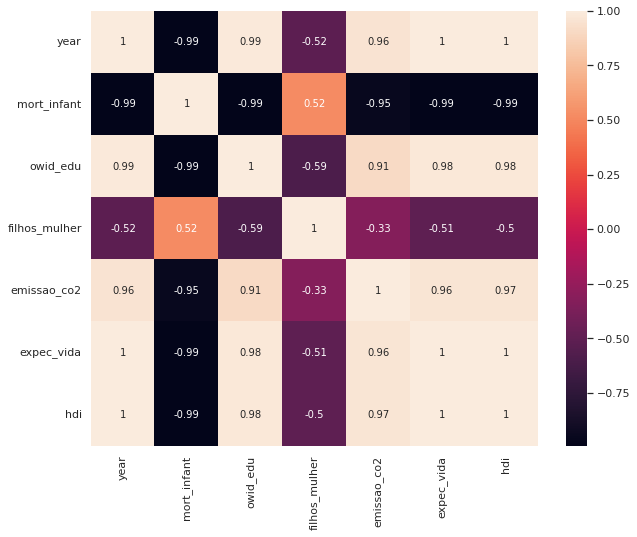

In [156]:
# China relevant plots and trends

china_corr = df_gapminder_ch.corr()

sns.heatmap(china_corr, 
            xticklabels=china_corr.columns.values,
            yticklabels=china_corr.columns.values, annot=True)
